## PHF ball and barcode plot animations

should be in the PHF directory

In [1]:
from rdkit import Chem
import numpy as np
import scipy.spatial
import numpy.linalg as LA
import matplotlib
from stl import mesh
import sys
import scipy
import gif
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits
from matplotlib import pyplot
import mpl_toolkits.mplot3d as mplot3d
import pandas as pd
#!conda install --yes --prefix {sys.prefix} stl
#!{sys.executable} -m pip uninstall -y stl
#!{sys.executable} -m pip uninstall -y numpy-stl
#!{sys.executable} -m pip install -U gif

#chem stuff 
import py3Dmol as py3Dmol
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #

In [3]:
## FUNCTIONS 
def atoms_from_mol_file(mol_file,no_of_atoms,verbose=True):
    """Grabs the atoms from a read in version of a molfile"""
    chopped_mol=mol_file.split('\n')[4:]
    atom_list=[]
    for idx in range(no_of_atoms):
        if verbose:
            print(chopped_mol[idx])
        line=chopped_mol[idx].split(' ')
        data=[x for x in line if not x =='']
        if verbose:
            print(data[3])
        atom_list.append(data[3])
    return atom_list

def coords_from_smiles_strings(smiles_string, verbose=False):
    """Uses RDKit to add Hydrogens, get 3D coords, do a simple minimisation
    and outputs coords and atom types. 
    Repeated use yields slightly different coords"""
    # example - molecules is randomly rotated each time this is called
    # grab a smiles string
    m2 = Chem.MolFromSmiles(smiles_string) 
    # embed it what ever that is
    AllChem.EmbedMolecule(m2)
    # add some hydrogens
    m3 = Chem.AddHs(m2)
    # embed it again? I think this makes a molecule object but who knows
    AllChem.EmbedMolecule(m3) 
    # use MMFF94 to minimise and make a nice structure
    AllChem.MMFFOptimizeMolecule(m3)
    # get molefile
    mol_file=Chem.MolToMolBlock(m3)
    if verbose:
        print(mol_file)  
    #AllChem.Compute2DCoords(m2)
    #coords=[]
    for c in m3.GetConformers():
        if verbose:
            print(c.GetPositions())
    coords=c.GetPositions()
    no_of_atoms=c.GetNumAtoms()
    atom_list=atoms_from_mol_file(mol_file, no_of_atoms,verbose=verbose)
    # print m3 imag3e
    m3
    return m3, coords, atom_list

df_colors = pd.read_csv("C:\\Users\\ella_\\Documents\\GitHub\\icosahedron_projection\\JMolColors-master\\JMolColors-master\\jmolcolors.csv")

def get_colour(atom):
    """
    Returns RGB color tuple corresponding to atom

    :param str atom: symbol for atom
    """
    r = df_colors[df_colors['atom'] == atom]['R'].values[0] / 255.0
    g = df_colors[df_colors['atom'] == atom]['G'].values[0] / 255.0
    b = df_colors[df_colors['atom'] == atom]['B'].values[0] / 255.0
    return (r, g, b)

def get_colour_list(atom_list):
    colour_list=[]
    for atom in atom_list:
        if atom == 'H':
            colour=(0,0.5,0.5)
        else:
            if atom == 'C':
                colour=(0,0,0)
            else:
                colour=get_colour(atom)
        colour_list.append(colour)
    return colour_list



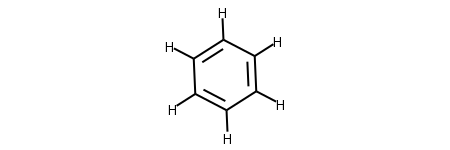

In [4]:
benzene=coords_from_smiles_strings('c1ccccc1')
benzene[0]

C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001DCEA50EB88>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


(-1, 12)

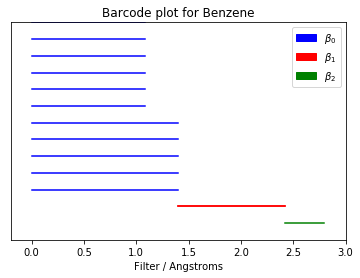

In [72]:
import matplotlib.patches as mpatches
#line_up, = plt.plot([1, 2, 3], label='Line 2')
#line_down, = plt.plot([3, 2, 1], label='Line 1')
i=11
b1=plt.plot([BD[i][0],BD[i][1]], [12-i, 12-i], c=color_list[i], label=r'$\beta_1$')
plt.legend([b1], ['egg'])
for i in range(len(BD)):
    plt.plot([BD[i][0],BD[i][1]], [12-i, 12-i], c=color_list[i])
#plt.legend([r'$\beta_0$', r'$\beta_1$', r'$\beta_2$'], ['b', 'r', 'g'])
plt.title(r'Barcode plot for Benzene')
blue_patch = mpatches.Patch(color='b', label=r'$\beta_0$')
red_patch = mpatches.Patch(color='red', label=r'$\beta_1$')
green_patch = mpatches.Patch(color='g', label=r'$\beta_2$')
plt.legend(handles=[blue_patch, red_patch, green_patch])
#axes.axis('off')
plt.xlabel('Filter / Angstroms')
ax=plt.gca()
ax.yaxis.set_ticks([])
plt.xlim([-0.2,3])
plt.ylim([-1,12])

In [15]:
BD= [[0., 1.08233893, 0.],
[0., 1.08233893, 0.],
[0., 1.08233893, 0.],
[0., 1.08233893, 0.],
[0., 1.08233893, 0.],
[0., 1.08233893, 0.],
[0., 1.39904296, 0.],
[0., 1.39904296, 0.],
[0., 1.39904296, 0.],
[0., 1.39904296, 0.],
[0., 1.39904296, 0.],
[1.39904296, 2.42321348, 1.],
[2.42321348, 2.79808593, 2.]]

color_list=[]
for i in range(len(BD)):
    if BD[i][2] == 0.0:
        color_list.append('b')
    elif BD[i][2] == 1.0:
        color_list.append('r')
    elif BD[i][2] == 2.0:
        color_list.append('g')

In [195]:
@gif.frame
def plot_barcode_at_eta(eta):
    for i in range(len(BD)):
        feat_start = BD[i][0]
        feat_end = BD[i][1]
        if eta > feat_start:
            # we'll plot it
            if eta < feat_end:
                feat_end = eta
            plt.plot([feat_start,feat_end], [12-i, 12-i], c=color_list[i])
    #plt.legend([r'$\beta_0$', r'$\beta_1$', r'$\beta_2$'], ['b', 'r', 'g'])
    plt.title(r'Barcode plot for Benzene')
    blue_patch = mpatches.Patch(color='b', label=r'$\beta_0$')
    red_patch = mpatches.Patch(color='red', label=r'$\beta_1$')
    green_patch = mpatches.Patch(color='g', label=r'$\beta_2$')
    plt.legend(handles=[blue_patch, red_patch, green_patch])
    #axes.axis('off')
    plt.xlabel('Filter / Angstroms')
    ax=plt.gca()
    ax.yaxis.set_ticks([])
    plt.xlim([-0.2,3])
    plt.ylim([-1,12])
    pyplot.draw()
    return

frames = []
for i in range(100):
    eta = 0 + i*3.0/100
    frame = plot_barcode_at_eta(eta)
    frames.append(frame)
    
gif.save(frames, 'benzene_barcode_plot' + '.gif', duration=100)

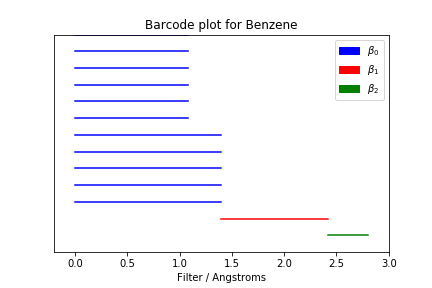

In [170]:
plot_icosahedron_and_molecule(eta=3.0)

In [107]:
coords=benzene[1]
coords

array([[ 1.23658499, -0.64433999, -0.03498485],
       [ 1.17578542,  0.74913592, -0.04315573],
       [-0.06079928,  1.39347605, -0.00816963],
       [-1.23658531,  0.64434018,  0.03498919],
       [-1.17578629, -0.74913592,  0.04316152],
       [ 0.06079899, -1.39347521,  0.00817452],
       [ 2.20002602, -1.14635615, -0.06225217],
       [ 2.09185736,  1.33279982, -0.0767784 ],
       [-0.10816627,  2.47915456, -0.01454209],
       [-2.20002692,  1.14635509,  0.06224596],
       [-2.09185807, -1.33280087,  0.07677972],
       [ 0.10816939, -2.4791535 ,  0.01453195]])

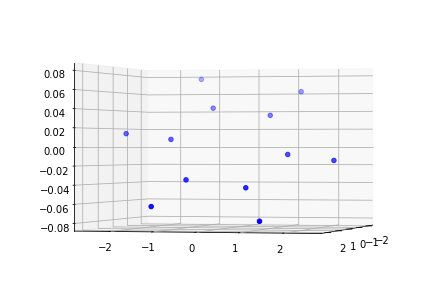

In [100]:
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)
#plt.scatter(coords[:,0], coords[:,1])
#axes.equal()
axes.scatter(coords[:,0],coords[:,1],coords[:,2], c='b')
axes.view_init(0,+15)
pyplot.draw()

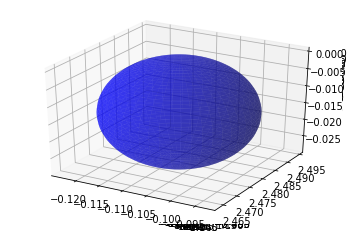

In [120]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
#plt_sphere(list_center, list_radius) 
for c, r in zip(list_center, list_radius):
        ax = fig.add_subplot(projection='3d')
    
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x = r*np.cos(u)*np.sin(v)
        y = r*np.sin(u)*np.sin(v)
        z = r*np.cos(v)

        ax.plot_surface(x-c[0], y-c[1], z-c[2], color=np.random.choice(['g','b']), alpha=0.05*np.random.random()+0.5)


In [116]:
plt_sphere(list_center[3], eta)

TypeError: zip argument #2 must support iteration

In [133]:
coords

array([[ 1.23658499, -0.64433999, -0.03498485],
       [ 1.17578542,  0.74913592, -0.04315573],
       [-0.06079928,  1.39347605, -0.00816963],
       [-1.23658531,  0.64434018,  0.03498919],
       [-1.17578629, -0.74913592,  0.04316152],
       [ 0.06079899, -1.39347521,  0.00817452],
       [ 2.20002602, -1.14635615, -0.06225217],
       [ 2.09185736,  1.33279982, -0.0767784 ],
       [-0.10816627,  2.47915456, -0.01454209],
       [-2.20002692,  1.14635509,  0.06224596],
       [-2.09185807, -1.33280087,  0.07677972],
       [ 0.10816939, -2.4791535 ,  0.01453195]])

In [197]:
#import numpy as np
#import random
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D


@gif.frame
def plot_molecule_balls(coords, eta, color='b'):
    # eta is a radius, is used as diameter here
    fig = plt.figure(figsize=(9,9))


    #for i in range(len(coords)):
    ax = fig.add_subplot(111, projection='3d')
        #ax.set_aspect('equal')
        #ax.set_box_aspect([1,1,1])
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = eta/2 * np.outer(np.cos(u), np.sin(v)) #+ coords[i,0]
    y = eta/2 * np.outer(np.sin(u), np.sin(v)) #+ coords[i,1]
    z = eta/2 * np.outer(np.ones(np.size(u)), np.cos(v)) #+ coords[i,2]
    for i in range(len(coords)):
        ax.plot_surface(x+coords[i,0], 
                        y+coords[i,1], 
                        z+coords[i,2],  
                        rstride=4, 
                        cstride=4, 
                        color=color, linewidth=0, alpha=0.5)
    ax.scatter(coords[:,0],coords[:,1],coords[:,2], c='k')

    ax.view_init(elev = 90, azim = -90)
    ax.axes.set_xlim3d(left=-6, right=6) 
    ax.axes.set_ylim3d(bottom=-6, top=6) 
    ax.axes.set_zlim3d(bottom=-6, top=6)
    set_axes_equal(ax)

    pyplot.draw()
        
    return

#plot_molecule_balls(coords=coords, eta=0.5, color='g')       


#plt.show()

In [198]:
frames = []
num_frames = 100
for i in range(num_frames):
    eta = 0 + i*3.0/num_frames
    if eta < 
    .39904296:
        color = 'b'
    elif (eta >= 1.39904296) and (eta < 2.42321348):
        color = 'r'
    elif eta >= 2.42321348:
        color = 'g'
    frame = plot_molecule_balls(coords=coords, eta=eta, color=color)
    frames.append(frame)
    
gif.save(frames, 'benzene_ball_plot' + '.gif', duration=100)        
        
        


In [191]:
gif.save(frames, 'benzene_ball_plot_fast' + '.gif', duration=50)

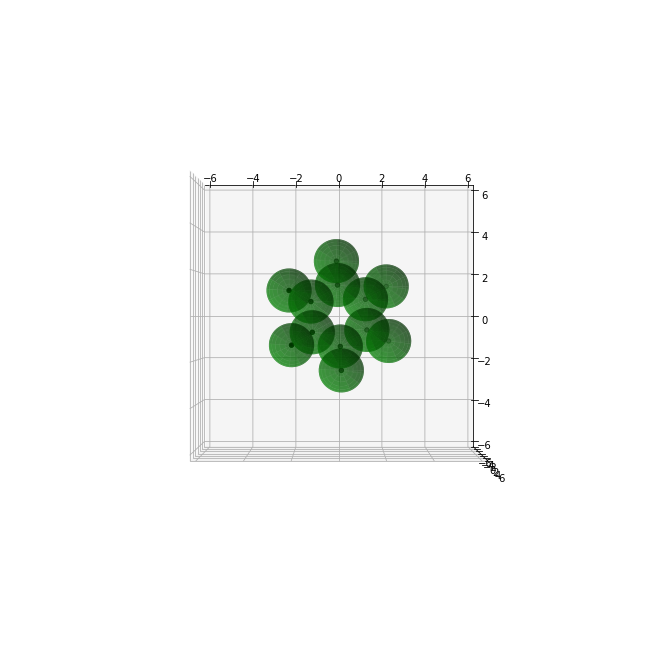

In [184]:
plot_molecule_balls(coords=coords, eta=1, color='g')

In [193]:
frames

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DC9FD16B08>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DC9FD2CFC8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA0AC6F08>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DC9E989E48>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA0C16DC8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA12383C8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA12E1A88>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA1330A48>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA13E4E48>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA1418D48>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA1442DC8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x1DCA155A248>,
 <PIL.PngImagePl

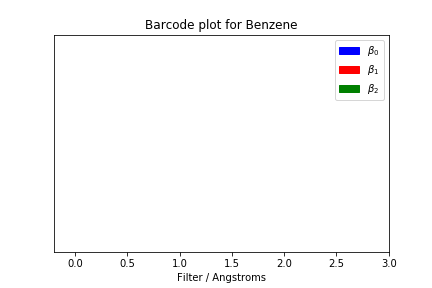

In [194]:
frames[0]